Load a set of dependencies

In [1]:
import pandas as pd
import re

Read in the raw CSV

In [2]:
raw = pd.read_csv('../../../../working/metrics/events/all.csv')

Clean it up a bit

In [3]:
raw = raw.rename(
    columns={
        'Ward (from Venue)': 'ward',
        'Postcode (from Venue)': 'postcode',
        'ACTUAL Audience size / number of participants - IN PERSON': 'participants_in_person',
        'ACTUAL Audience size / number of participants - ONLINE': 'participants_online',
    }
).rename(columns=lambda x: re.sub(r'\s+', '_', x.lower()))

raw.start_date = pd.to_datetime(raw.start_date)
raw.end_date = pd.to_datetime(raw.end_date)

raw = raw[raw.project_type != 'CLE']

Output the raw data

In [4]:
raw

,event_unique_identifier,project_name,event_name,event_type,season,start_date,airtable_id,participants_in_person,project_type,ward,postcode,end_date,number_of_booked_participants,participants_online
0,Waking the Artist: Leeds city college - Theatr...,Waking the Artist,Leeds city college - Theatre Design and Produc...,['CLE - Creative Learning session'],['Season 1 - Awakening'],2023-02-22,905,11.0,NaN,NaN,NaN,NaT,NaN,NaN
2,05 - The Barn: Braindance with Hyde Park Book ...,05 - The Barn,Braindance with Hyde Park Book Club,['Public Event - Performance'],['Season 2 - Playing'],2023-05-20,1160,316.0,Produce (Signature),['Headingley and Hyde Park'],['LS6 2UZ'],2023-05-20,NaN,NaN
4,Skills Development: Early Career Music Promote...,Skills Development,Early Career Music Promoters CPWM gig - Elise,['Partner Programme - Event'],['Season 2 - Playing'],NaT,1348,NaN,NaN,NaN,NaN,NaT,NaN,NaN
5,Harewood House: Gwen Stefani,Harewood House,Gwen Stefani,['Public Event - Large Scale Outdoor Event'],['Season 2 - Playing'],2023-06-27,487,NaN,Promote,['Harewood'],['LS17 9LG'],2023-06-27,NaN,NaN
6,05 - The Barn: Schools Day 1,05 - The Barn,Schools Day 1,['CLE - Community Engagement session'],['Season 2 - Playing'],2023-05-09,207,180.0,Produce (Signature),['Headingley and Hyde Park'],['LS6 2UZ'],2023-05-09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,12 - My LEEDS 2023: My LEEDS Summer: Hunslet a...,12 - My LEEDS 2023,My LEEDS Summer: Hunslet and Riverside Festiva...,['Public Event - Performance'],['Season 2 - Playing'],2023-06-17,415,NaN,Produce (Signature),['Hunslet and Riverside'],['LS10 2QT'],2023-06-17,NaN,NaN
1178,:,NaN,NaN,NaN,NaN,NaT,1153,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1179,"Embassy of Netherlands, Meet Leeds Lab: Embass...","Embassy of Netherlands, Meet Leeds Lab","Embassy of Netherlands, Meet Leeds Lab",['Partner Programme - Event'],['Season 1 - Awakening'],2023-01-16,305,NaN,Partner,NaN,NaN,2023-01-20,NaN,NaN
1181,09 - Smeaton300: Moon Palace East Leeds Observ...,09 - Smeaton300: Moon Palace East Leeds Observ...,Delivery of Skills Development programme,['CLE - Skills and Talent session'],"['Season 1 - Awakening', 'Season 2 - Playing']",2023-02-06,223,NaN,Produce (Signature),NaN,NaN,2023-05-29,NaN,NaN


Calculate the counts of each kind of event

In [5]:
event_count = raw.groupby(['project_type'])[['event_unique_identifier']].count()
event_count = event_count.rename(
    columns = {
        'event_unique_identifier': 'event_count'      
    }
)

Plot a bar chart

,event_count
project_type,
Partner,96
Produce (Signature),416
Promote,58


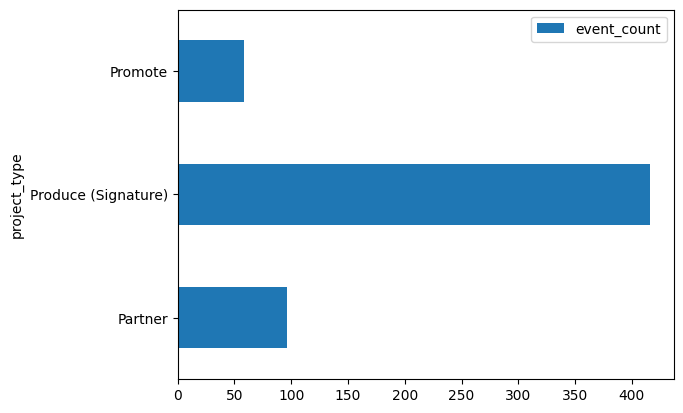

In [6]:
event_count.plot.barh()
event_count